In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir("D:/Term-2/MachineLearning/Time sereis")

In [2]:
inp=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")
inp.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
#Changing the date column to atime Interval column
inp.date = pd.DatetimeIndex(inp.date)
inp.date

0       2005-01-01
1       2006-01-01
2       2010-01-01
3       2011-01-01
4       2012-01-01
5       2013-01-01
6       2014-01-01
7       2015-01-01
8       2005-02-01
9       2006-02-01
10      2010-02-01
11      2011-02-01
12      2012-02-01
13      2013-02-01
14      2014-02-01
15      2015-02-01
16      2005-03-01
17      2006-03-01
18      2010-03-01
19      2011-03-01
20      2012-03-01
21      2013-03-01
22      2014-03-01
23      2015-03-01
24      2006-04-01
25      2010-04-01
26      2011-04-01
27      2012-04-01
28      2013-04-01
29      2014-04-01
           ...    
10197   2010-10-01
10198   2011-10-01
10199   2012-10-01
10200   2013-10-01
10201   2014-10-01
10202   2015-10-01
10203   2004-11-01
10204   2005-11-01
10205   2006-11-01
10206   2007-11-01
10207   2008-11-01
10208   2009-11-01
10209   2010-11-01
10210   2011-11-01
10211   2012-11-01
10212   2013-11-01
10213   2014-11-01
10214   2015-11-01
10215   2004-12-01
10216   2005-12-01
10217   2006-12-01
10218   2007

In [4]:
#Change the index to the date column
inp.index= pd.PeriodIndex(inp.date,freq='M')
inp.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [5]:
#Sort the data frame by date
inp=inp.sort_values(by='date')
inp.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [6]:
dfBang = inp.loc[inp.city=='BANGALORE'].copy()
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [7]:
#Drop redundant columns
dfBang = dfBang.drop(['market','month','year','priceMin','priceMax','state','city'],axis=1)
dfBang.head()

,quantity,priceMod,date
date,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


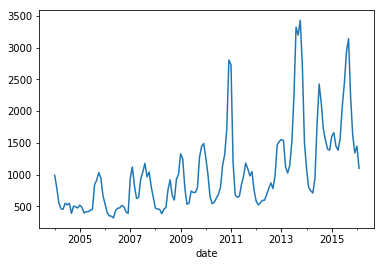

In [8]:
dfBang.priceMod.plot()

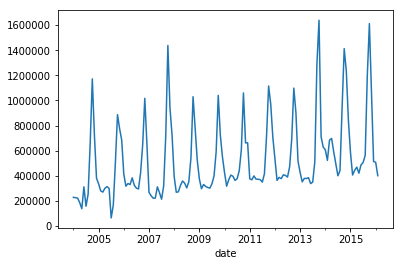

In [9]:
dfBang.quantity.plot()

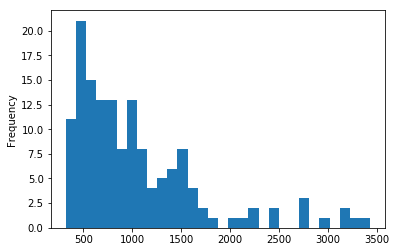

In [10]:
dfBang.priceMod.plot(kind="hist",bins=30)

In [11]:
dfBang['priceModLog']=np.log(dfBang.priceMod)

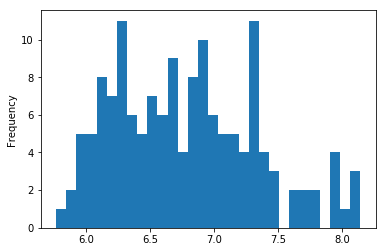

In [12]:
dfBang.priceModLog.plot(kind="hist",bins=30)

In [13]:
#Mean Model
model_mean_pred = dfBang.priceModLog.mean()
model_mean_pred

6.785096916821528

In [14]:
#Let us store as our Mean Predication Value
dfBang['priceMean']=np.exp(model_mean_pred)
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean
date,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812
2004-02,225133,793,2004-02-01,6.675823,884.565812
2004-03,221952,556,2004-03-01,6.320768,884.565812
2004-04,185150,465,2004-04-01,6.142037,884.565812
2004-05,137390,455,2004-05-01,6.120297,884.565812


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


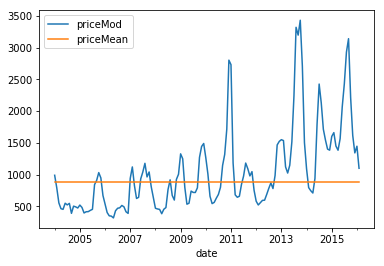

In [15]:
dfBang.plot(kind='line',x="date",y=['priceMod','priceMean'])


In [16]:
def RMSE(predicted,actual):
    mse = (predicted-actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [17]:
model_mean_RMSE = RMSE(dfBang.priceMean,dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [18]:
dfBangResults = pd.DataFrame(columns=['Model','Forecast','Rmse'])
dfBangResults.loc[0,'Model']='Mean'
dfBangResults.loc[0,'Forecast']=np.exp(model_mean_pred)
dfBangResults.loc[0,'RMSE']=model_mean_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348


In [19]:
#wHAT is the start month of our date
dfBang.date.min()


Timestamp('2004-01-01 00:00:00')

In [20]:
#Converting date in datetimedelta figure starting from zero
dfBang['timeindex']=dfBang.date-dfBang.date.min()
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeindex
date,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0 days
2004-02,225133,793,2004-02-01,6.675823,884.565812,31 days
2004-03,221952,556,2004-03-01,6.320768,884.565812,60 days
2004-04,185150,465,2004-04-01,6.142037,884.565812,91 days
2004-05,137390,455,2004-05-01,6.120297,884.565812,121 days


In [21]:
#Converting the month using timedelta function
dfBang['timeIndex']=dfBang['timeindex']/np.timedelta64(1,'M')

In [22]:
#Round the number to 0
dfBang['timeIndex']=dfBang['timeIndex'].round(0).astype(int)

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [24]:
#Now plot linear regression between priceMod and timeIndex
model_linear=smf.ols('priceModLog~timeIndex',data=dfBang).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           5.75e-23
Time:                        11:43:24   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeIndex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#parametre for y=mx+c equation
model_linear.params

Intercept    6.112108
timeIndex    0.009283
dtype: float64

In [26]:
model_linear_pred =model_linear.predict()
model_linear_pred

array([6.11210813, 6.12139074, 6.13067334, 6.13995594, 6.14923855,
       6.15852115, 6.16780376, 6.17708636, 6.18636896, 6.19565157,
       6.20493417, 6.21421678, 6.22349938, 6.23278198, 6.24206459,
       6.25134719, 6.2606298 , 6.2699124 , 6.279195  , 6.28847761,
       6.29776021, 6.30704282, 6.31632542, 6.32560802, 6.33489063,
       6.34417323, 6.35345583, 6.36273844, 6.37202104, 6.38130365,
       6.39058625, 6.39986885, 6.40915146, 6.41843406, 6.42771667,
       6.43699927, 6.44628187, 6.45556448, 6.46484708, 6.47412969,
       6.48341229, 6.49269489, 6.5019775 , 6.5112601 , 6.52054271,
       6.52982531, 6.53910791, 6.54839052, 6.55767312, 6.56695572,
       6.57623833, 6.58552093, 6.59480354, 6.60408614, 6.61336874,
       6.62265135, 6.63193395, 6.64121656, 6.65049916, 6.65978176,
       6.66906437, 6.67834697, 6.68762958, 6.69691218, 6.70619478,
       6.71547739, 6.72475999, 6.7340426 , 6.7433252 , 6.7526078 ,
       6.76189041, 6.77117301, 6.78045561, 6.78973822, 6.79902

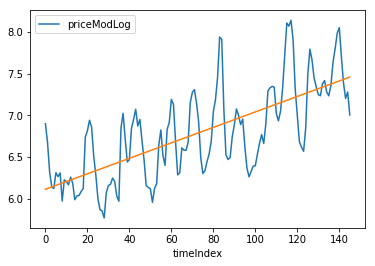

In [27]:
#plot the prediction line
dfBang.plot(kind="line",x='timeIndex',y='priceModLog')
plt.plot(dfBang.timeIndex,model_linear_pred,'-')

In [28]:
dfBang['priceLinear']=np.exp(model_linear_pred)
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeindex,timeIndex,priceLinear
date,,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0 days,0,451.289090
2004-02,225133,793,2004-02-01,6.675823,884.565812,31 days,1,455.497732
2004-03,221952,556,2004-03-01,6.320768,884.565812,60 days,2,459.745622
2004-04,185150,465,2004-04-01,6.142037,884.565812,91 days,3,464.033127
2004-05,137390,455,2004-05-01,6.120297,884.565812,121 days,4,468.360617


In [29]:
#RMSE
model_linear_RMSE = RMSE(dfBang.priceLinear,dfBang.priceMod)
model_linear_RMSE

518.523607584147

In [30]:
#Manual Clculation
model_linear_forecast_manual=0.009283*146+6.112108
model_linear_forecast_manual

7.467426

In [31]:
#dfBangResults = pd.DataFrame(columns=['Model','Forecast','Rmse'])
dfBangResults.loc[1,'Model']='Linear'
dfBangResults.loc[1,'Forecast']=np.exp(model_linear_forecast_manual)
dfBangResults.loc[1,'RMSE']=model_linear_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348
1,Linear,1750.1,NaN,518.523608


In [33]:
#Random Walk
dfBang["priceModLogShift1"] = dfBang.priceModLog.shift()


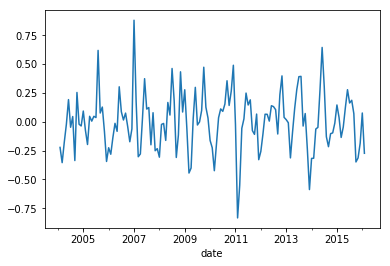

In [35]:
# Lets plot the one-month difference curve
dfBang["priceModLogDiff"] = dfBang.priceModLog - dfBang.priceModLogShift1
dfBang.priceModLogDiff.plot()

In [36]:
dfBang["priceRandom"] = np.exp(dfBang.priceModLogShift1)
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeindex,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom
date,,,,,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0 days,0,451.289090,NaN,NaN,NaN
2004-02,225133,793,2004-02-01,6.675823,884.565812,31 days,1,455.497732,6.898715,-0.222891,991.0
2004-03,221952,556,2004-03-01,6.320768,884.565812,60 days,2,459.745622,6.675823,-0.355055,793.0
2004-04,185150,465,2004-04-01,6.142037,884.565812,91 days,3,464.033127,6.320768,-0.178731,556.0
2004-05,137390,455,2004-05-01,6.120297,884.565812,121 days,4,468.360617,6.142037,-0.021740,465.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


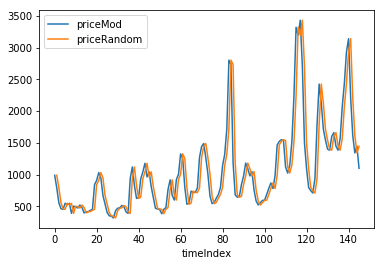

In [37]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [38]:
model_random_RMSE = RMSE(dfBang.priceRandom, dfBang.priceMod)
model_random_RMSE


323.59240006420174

In [39]:
dfBangResults.loc[2,"Model"] = "Random"
dfBangResults.loc[2,"Forecast"] = np.exp(dfBang.priceModLogShift1[-1])
dfBangResults.loc[2,"RMSE"] = model_random_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348
1,Linear,1750.1,NaN,518.523608
2,Random,1448,NaN,323.592400


In [40]:
def adf(ts):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  after removing the cwd from sys.path.


518.821751048081

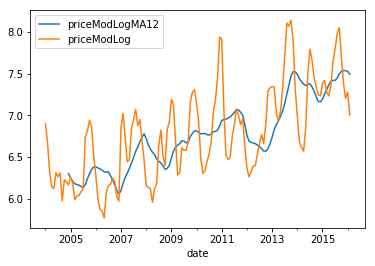

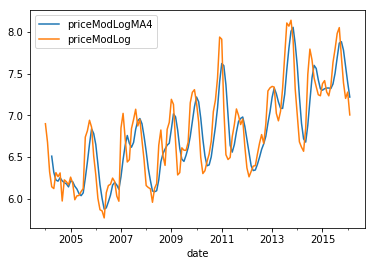

In [41]:
dfBang['priceModLogMA12'] = pd.rolling_mean(dfBang.priceModLog, window = 12)
dfBang.plot(kind ="line", y=["priceModLogMA12", "priceModLog"])

dfBang['priceModLogMA4'] = pd.rolling_mean(dfBang.priceModLog, window = 4)
dfBang.plot(kind ="line", y=["priceModLogMA4", "priceModLog"])

dfBang["priceMA12"] = np.exp(dfBang.priceModLogMA12)
dfBang.tail()
model_MA12_forecast = dfBang.priceModLog.tail(12).mean()
model_MA12_RMSE = RMSE(dfBang.priceMA12, dfBang.priceMod)
model_MA12_RMSE


In [42]:
dfBang["priceMA4"] = np.exp(dfBang.priceModLogMA4)
dfBang.tail()
model_MA4_forecast = dfBang.priceModLog.tail(4).mean()
model_MA4_RMSE = RMSE(dfBang.priceMA4, dfBang.priceMod)
model_MA4_RMSE


364.8382197199629

In [43]:
dfBangResults.loc[3,"Model"] = "Moving Average 12"
dfBangResults.loc[3,"Forecast"] = np.exp(model_MA12_forecast)
dfBangResults.loc[3,"RMSE"] = model_MA12_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348
1,Linear,1750.1,NaN,518.523608
2,Random,1448,NaN,323.592400
3,Moving Average 12,1794.69,NaN,518.821751


In [44]:
dfBangResults.loc[4,"Model"] = "Moving Average 4"
dfBangResults.loc[4,"Forecast"] = np.exp(model_MA4_forecast)
dfBangResults.loc[4,"RMSE"] = model_MA4_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348
1,Linear,1750.1,NaN,518.523608
2,Random,1448,NaN,323.592400
3,Moving Average 12,1794.69,NaN,518.821751
4,Moving Average 4,1364.28,NaN,364.838220


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


547.1628109333545

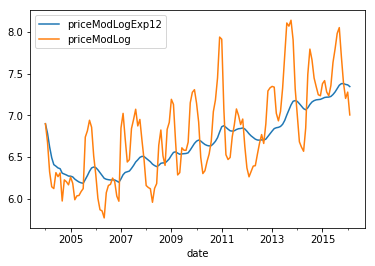

In [45]:

dfBang['priceModLogExp12'] = pd.ewma(dfBang.priceModLog, halflife=12)
dfBang.plot(kind ="line", y=["priceModLogExp12", "priceModLog"])
dfBang["priceExp12"] = np.exp(dfBang.priceModLogExp12)
dfBang.tail()
# Root Mean Squared Error (RMSE)
model_Exp12_RMSE = RMSE(dfBang.priceExp12, dfBang.priceMod)
model_Exp12_RMSE

In [46]:
y_exp = dfBang.priceModLog[-1]
y_exp
y_for = dfBang.priceModLogExp12[-1]
y_for
halflife = 12
alpha = 1 - np.exp(np.log(0.5)/halflife)
alpha
model_Exp12_forecast = alpha * y_exp + (1 - alpha) * y_for


In [47]:

dfBangResults.loc[5,"Model"] = "Exp Smoothing 12"
dfBangResults.loc[5,"Forecast"] = np.exp(model_Exp12_forecast)
dfBangResults.loc[5,"RMSE"] = model_Exp12_RMSE
dfBangResults.head()

,Model,Forecast,Rmse,RMSE
0,Mean,884.566,NaN,683.953348
1,Linear,1750.1,NaN,518.523608
2,Random,1448,NaN,323.592400
3,Moving Average 12,1794.69,NaN,518.821751
4,Moving Average 4,1364.28,NaN,364.838220
